In [66]:
import pandas as pd; import geopandas as gpd; import seaborn as sns
from shapely.geometry import Point;
import fiona, sys, json;
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

,LEVEL,TYPE,ADMIN,SU_A3,NAME,NAME_LONG,BRK_A3,BRK_NAME,ABBREV,POSTAL,...,ISO_A2,ISO_A3,ISO_N3,UN_A3,ADM0_A3_US,CONTINENT,REGION_UN,SUBREGION,WIKIDATAID,geometry
0,2,Sovereign country,Indonesia,IDN,Indonesia,Indonesia,IDN,Indonesia,Indo.,INDO,...,ID,IDN,360,360,IDN,Asia,Asia,South-Eastern Asia,Q252,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Sovereign country,Malaysia,MYS,Malaysia,Malaysia,MYS,Malaysia,Malay.,MY,...,MY,MYS,458,458,MYS,Asia,Asia,South-Eastern Asia,Q833,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,2,Sovereign country,Chile,CHL,Chile,Chile,CHL,Chile,Chile,CL,...,CL,CHL,152,152,CHL,South America,Americas,South America,Q298,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


<AxesSubplot:>

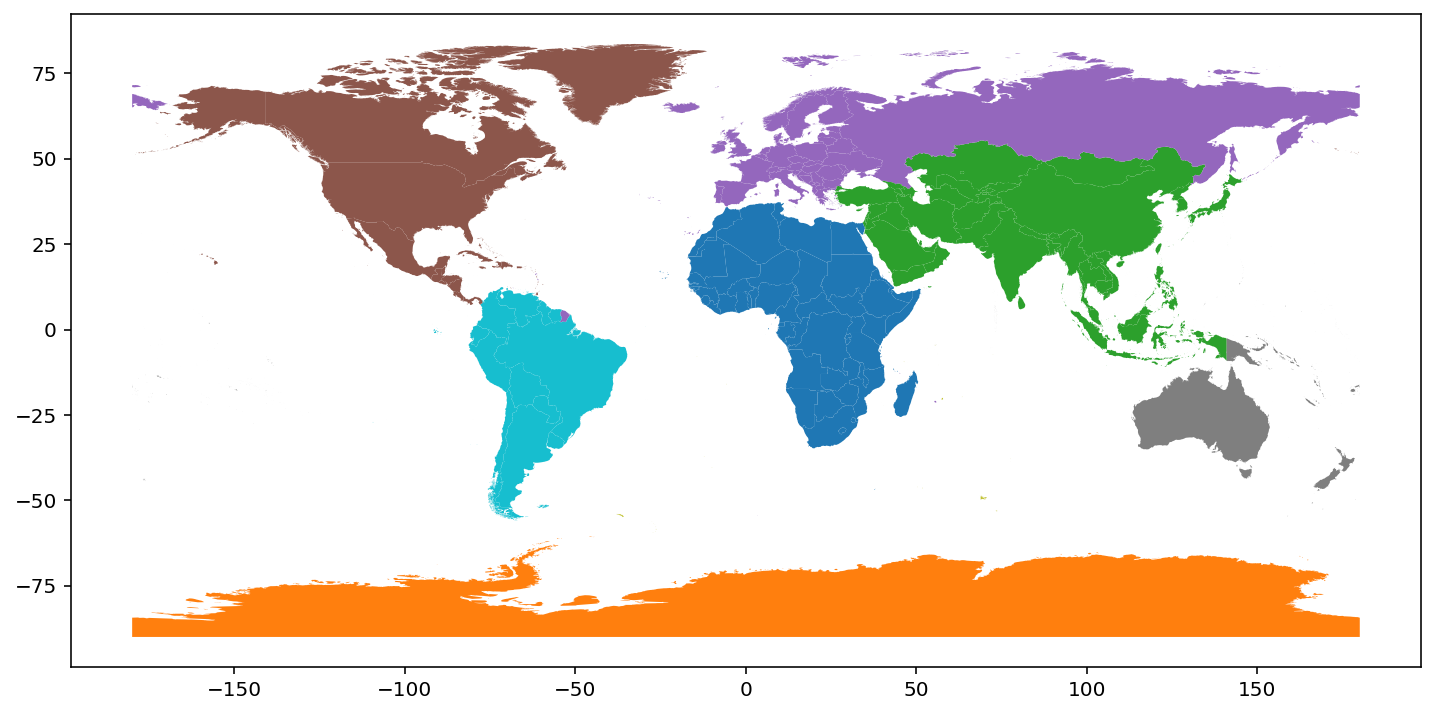

In [67]:
# First, read in a file that has Country Boundaries
# (From Natural Earth)
countries = gpd.read_file('./data/countries.geojson') #Simplified geometries; not exact.
display(countries.head(3))
countries.plot(figsize=(16,6), column='CONTINENT')

In [68]:
countries.columns

Index(['LEVEL', 'TYPE', 'ADMIN', 'SU_A3', 'NAME', 'NAME_LONG', 'BRK_A3',
       'BRK_NAME', 'ABBREV', 'POSTAL', 'NAME_SORT', 'NAME_ALT', 'POP_EST',
       'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR',
       'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'UN_A3', 'ADM0_A3_US', 'CONTINENT', 'REGION_UN', 'SUBREGION',
       'WIKIDATAID', 'geometry'],
      dtype='object')

In [78]:
countries['TOL'] = 0
with open('./data/line-delimited/countries.tsv','w') as outFile: 
    outFile.write(countries[
        ['ADMIN','SU_A3','NAME','CONTINENT','REGION_UN','SUBREGION','TOL','geometry']
    ].to_csv(sep='\t', header=False))

In [81]:
simplified1 = countries.copy(deep=True)
simplified1['geometry'] = simplified1.geometry.simplify(0.1)
simplified1['TOL'] = 0.1
with open('./data/line-delimited/countries_simplified_1.tsv','w') as outFile: 
    outFile.write(simplified1[
        ['ADMIN','SU_A3','NAME','CONTINENT','REGION_UN','SUBREGION','TOL','geometry']
    ].to_csv(sep='\t', header=False))

In [82]:
simplified01 = countries.copy(deep=True)
simplified01['geometry'] = simplified01.geometry.simplify(0.01)
simplified01['TOL'] = 0.01
with open('./data/line-delimited/countries_simplified_01.tsv','w') as outFile: 
    outFile.write(simplified01[
        ['ADMIN','SU_A3','NAME','CONTINENT','REGION_UN','SUBREGION','TOL','geometry']
    ].to_csv(sep='\t', header=False))

In [83]:
simplified001 = countries.copy(deep=True)
simplified001['geometry'] = simplified001.geometry.simplify(0.001)
simplified001['TOL'] = 0.001
with open('./data/line-delimited/countries_simplified_001.tsv','w') as outFile: 
    outFile.write(simplified001[
        ['ADMIN','SU_A3','NAME','CONTINENT','REGION_U N','SUBREGION','TOL','geometry']
    ].to_csv(sep='\t', header=False))